In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
vists_district_15_df = pd.read_csv('/data/afg_anon/displacement_metrics/visits_per_district_day/k_15.csv')

In [4]:
vists_district_15_df

,origin_district,impact_day,impacted,destination_district,visit_day,visits
0,101,1,86936,101,16,78951.0
1,101,1,86936,102,16,17.0
2,101,1,86936,103,16,6.0
3,101,1,86936,104,16,0.0
4,101,1,86936,105,16,6.0
...,...,...,...,...,...,...
231428239,3409,1461,0,3405,1476,NaN
231428240,3409,1461,0,3406,1476,NaN
231428241,3409,1461,0,3407,1476,NaN
231428242,3409,1461,0,3408,1476,NaN


# Isolating Data That Fits The Critera

In [19]:
# 101 - Kabul
# 1401 - Kunduz
# 2401 - Kandahar
possible_districts = [101, 1401, 2401]
vists_districtspecific_df = vists_district_15_df# [vists_district_15_df['origin_district'].isin(possible_districts)]
vists_districtspecific_day1_16_df =  vists_districtspecific_df[(vists_districtspecific_df['impact_day'] ==  1) & (vists_districtspecific_df['visit_day'] ==  16)]
vists_districtspecific_day1001_1016_df =  vists_districtspecific_df[(vists_districtspecific_df['impact_day'] ==  1001) & (vists_districtspecific_df['visit_day'] ==  1016)]
vists_districtspecific_day1_16_df
                                                               

,origin_district,impact_day,impacted,destination_district,visit_day,visits
0,101,1,86936,101,16,78951.0
1,101,1,86936,102,16,17.0
2,101,1,86936,103,16,6.0
3,101,1,86936,104,16,0.0
4,101,1,86936,105,16,6.0
...,...,...,...,...,...,...
230847159,3409,1,0,3405,16,NaN
230847160,3409,1,0,3406,16,NaN
230847161,3409,1,0,3407,16,NaN
230847162,3409,1,0,3408,16,NaN


In [20]:
vists_districtspecific_day1_16_df = vists_districtspecific_day1_16_df.reset_index()
vists_districtspecific_day1_16_df

,index,origin_district,impact_day,impacted,destination_district,visit_day,visits
0,0,101,1,86936,101,16,78951.0
1,1,101,1,86936,102,16,17.0
2,2,101,1,86936,103,16,6.0
3,3,101,1,86936,104,16,0.0
4,4,101,1,86936,105,16,6.0
...,...,...,...,...,...,...,...
158399,230847159,3409,1,0,3405,16,NaN
158400,230847160,3409,1,0,3406,16,NaN
158401,230847161,3409,1,0,3407,16,NaN
158402,230847162,3409,1,0,3408,16,NaN


/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


290.0

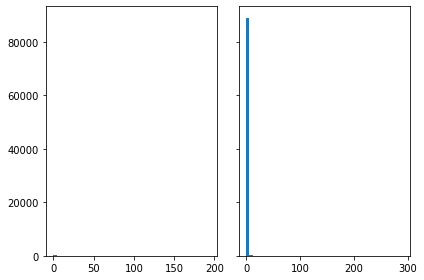

In [21]:
nonself_visits_df = vists_districtspecific_day1_16_df[vists_districtspecific_day1_16_df['origin_district'] != vists_districtspecific_day1_16_df['destination_district']]#.sort_values(by=['visits'], ascending=False)
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(vists_districtspecific_day1_16_df[vists_districtspecific_day1_16_df['origin_district'] == 101]['visits'][1:], bins=50)
axs[1].hist(nonself_visits_df['visits'], bins=50)

nonself_visits_df['visits'].max()

In [35]:
vists_districtspecific_day1_16_df[vists_districtspecific_day1_16_df['impacted'] != 0]['origin_district'].unique()

array([ 101,  102,  103,  104,  105,  107,  108,  109,  110,  111,  112,
        114,  115,  201,  202,  204,  205,  207,  301,  302,  304,  305,
        306,  307,  308,  309,  401,  407,  408,  409,  501,  502,  503,
        504,  505,  601,  603,  607,  608,  609,  613,  614,  615,  701,
        702,  703,  704,  705,  710,  711,  801,  802,  804,  805,  806,
        807,  808,  809,  810,  811,  812,  813,  814,  815,  816,  817,
        818,  819,  820,  821,  822,  901,  902,  903,  905, 1001, 1004,
       1007, 1011, 1012, 1014, 1101, 1102, 1103, 1105, 1107, 1108, 1109,
       1115, 1118, 1125, 1201, 1202, 1203, 1204, 1206, 1207, 1208, 1209,
       1210, 1211, 1212, 1213, 1214, 1216, 1301, 1303, 1304, 1306, 1307,
       1309, 1310, 1311, 1401, 1402, 1403, 1405, 1406, 1407, 1501, 1502,
       1506, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610,
       1611, 1612, 1613, 1614, 1615, 1701, 1702, 1703, 1704, 1706, 1707,
       1708, 1801, 1802, 1803, 1804, 1806, 1808, 18

# Export as CSVs for D3js Analysis

In [37]:
vists_districtspecific_day1_16_df = vists_districtspecific_day1_16_df[vists_districtspecific_day1_16_df['origin_district'] != vists_districtspecific_day1_16_df['destination_district']]

vists_districtspecific_day1_16_df['visits_percentage'] = vists_districtspecific_day1_16_df['visits'] / vists_districtspecific_day1_16_df['impacted']

vists_districtspecific_day1_16_df['visits'].max()
#percent_migrated_101_df.set_index('destination_district')['visits'].to_csv('data/district_101_migration_visits')

vists_districtspecific_day1_16_df.set_index('origin_district').drop(['index'], axis=1).to_csv('data/districts_migration_visits_percentage.csv')
vists_districtspecific_day1_16_df['visits'].max()

290.0

In [12]:
district_101_day1_16_df = vists_districtspecific_day1_16_df[vists_districtspecific_day1_16_df['origin_district'] == 101][1:]

district_101_day1_16_df.set_index('destination_district')['visits'].to_csv('data/district_101_migration_visits.csv')

# percentage will look the same visually as number (for now)
district_101_day1_16_df['visits_percentage'] = district_101_day1_16_df['visits'] / district_101_day1_16_df['impacted']
district_101_day1_16_df.set_index('destination_district')['visits_percentage'].to_csv('data/district_101_migration_visits_percentage.csv')

district_101_day1_16_df['visits'].max()

194.0

In [9]:
ls '/data/afg_anon/displacement_metrics/visits_per_district_day'

k_1.csv    k_119.csv  k_160.csv  k_27.csv  k_47.csv  k_67.csv  k_87.csv
k_10.csv   k_12.csv   k_165.csv  k_29.csv  k_49.csv  k_69.csv  k_89.csv
k_100.csv  k_120.csv  k_17.csv   k_3.csv   k_5.csv   k_7.csv   k_9.csv
k_101.csv  k_125.csv  k_170.csv  k_30.csv  k_50.csv  k_70.csv  k_90.csv
k_103.csv  k_13.csv   k_175.csv  k_31.csv  k_51.csv  k_71.csv  k_91.csv
k_105.csv  k_130.csv  k_18.csv   k_33.csv  k_53.csv  k_73.csv  k_93.csv
k_107.csv  k_135.csv  k_180.csv  k_35.csv  k_55.csv  k_75.csv  k_95.csv
k_109.csv  k_14.csv   k_19.csv   k_37.csv  k_57.csv  k_77.csv  k_97.csv
k_11.csv   k_140.csv  k_2.csv    k_39.csv  k_59.csv  k_79.csv  k_99.csv
k_110.csv  k_145.csv  k_20.csv   k_4.csv   k_6.csv   k_8.csv
k_111.csv  k_15.csv   k_21.csv   k_40.csv  k_60.csv  k_80.csv
k_113.csv  k_150.csv  k_22.csv   k_41.csv  k_61.csv  k_81.csv
k_115.csv  k_155.csv  k_23.csv   k_43.csv  k_63.csv  k_83.csv
k_117.csv  k_16.csv   k_25.csv   k_45.csv  k_65.csv  k_85.csv


In [38]:
count = 0
i = 0
while i <= 290:
    print(i, end=", ")
    count += 1
    i += 290/256
print()
print(count)

0, 1.1328125, 2.265625, 3.3984375, 4.53125, 5.6640625, 6.796875, 7.9296875, 9.0625, 10.1953125, 11.328125, 12.4609375, 13.59375, 14.7265625, 15.859375, 16.9921875, 18.125, 19.2578125, 20.390625, 21.5234375, 22.65625, 23.7890625, 24.921875, 26.0546875, 27.1875, 28.3203125, 29.453125, 30.5859375, 31.71875, 32.8515625, 33.984375, 35.1171875, 36.25, 37.3828125, 38.515625, 39.6484375, 40.78125, 41.9140625, 43.046875, 44.1796875, 45.3125, 46.4453125, 47.578125, 48.7109375, 49.84375, 50.9765625, 52.109375, 53.2421875, 54.375, 55.5078125, 56.640625, 57.7734375, 58.90625, 60.0390625, 61.171875, 62.3046875, 63.4375, 64.5703125, 65.703125, 66.8359375, 67.96875, 69.1015625, 70.234375, 71.3671875, 72.5, 73.6328125, 74.765625, 75.8984375, 77.03125, 78.1640625, 79.296875, 80.4296875, 81.5625, 82.6953125, 83.828125, 84.9609375, 86.09375, 87.2265625, 88.359375, 89.4921875, 90.625, 91.7578125, 92.890625, 94.0234375, 95.15625, 96.2890625, 97.421875, 98.5546875, 99.6875, 100.8203125, 101.953125, 103.08593

In [13]:
colors = ["#ffffff", "#f7fbff","#f6faff","#f5fafe","#f5f9fe","#f4f9fe","#f3f8fe","#f2f8fd","#f2f7fd","#f1f7fd","#f0f6fd","#eff6fc","#eef5fc","#eef5fc","#edf4fc","#ecf4fb","#ebf3fb","#eaf3fb","#eaf2fb","#e9f2fa","#e8f1fa","#e7f1fa","#e7f0fa","#e6f0f9","#e5eff9","#e4eff9","#e3eef9","#e3eef8","#e2edf8","#e1edf8","#e0ecf8","#e0ecf7","#dfebf7","#deebf7","#ddeaf7","#ddeaf6","#dce9f6","#dbe9f6","#dae8f6","#d9e8f5","#d9e7f5","#d8e7f5","#d7e6f5","#d6e6f4","#d6e5f4","#d5e5f4","#d4e4f4","#d3e4f3","#d2e3f3","#d2e3f3","#d1e2f3","#d0e2f2","#cfe1f2","#cee1f2","#cde0f1","#cce0f1","#ccdff1","#cbdff1","#cadef0","#c9def0","#c8ddf0","#c7ddef","#c6dcef","#c5dcef","#c4dbee","#c3dbee","#c2daee","#c1daed","#c0d9ed","#bfd9ec","#bed8ec","#bdd8ec","#bcd7eb","#bbd7eb","#b9d6eb","#b8d5ea","#b7d5ea","#b6d4e9","#b5d4e9","#b4d3e9","#b2d3e8","#b1d2e8","#b0d1e7","#afd1e7","#add0e7","#acd0e6","#abcfe6","#a9cfe5","#a8cee5","#a7cde5","#a5cde4","#a4cce4","#a3cbe3","#a1cbe3","#a0cae3","#9ec9e2","#9dc9e2","#9cc8e1","#9ac7e1","#99c6e1","#97c6e0","#96c5e0","#94c4df","#93c3df","#91c3df","#90c2de","#8ec1de","#8dc0de","#8bc0dd","#8abfdd","#88bedc","#87bddc","#85bcdc","#84bbdb","#82bbdb","#81badb","#7fb9da","#7eb8da","#7cb7d9","#7bb6d9","#79b5d9","#78b5d8","#76b4d8","#75b3d7","#73b2d7","#72b1d7","#70b0d6","#6fafd6","#6daed5","#6caed5","#6badd5","#69acd4","#68abd4","#66aad3","#65a9d3","#63a8d2","#62a7d2","#61a7d1","#5fa6d1","#5ea5d0","#5da4d0","#5ba3d0","#5aa2cf","#59a1cf","#57a0ce","#569fce","#559ecd","#549ecd","#529dcc","#519ccc","#509bcb","#4f9acb","#4d99ca","#4c98ca","#4b97c9","#4a96c9","#4895c8","#4794c8","#4693c7","#4592c7","#4492c6","#4391c6","#4190c5","#408fc4","#3f8ec4","#3e8dc3","#3d8cc3","#3c8bc2","#3b8ac2","#3a89c1","#3988c1","#3787c0","#3686c0","#3585bf","#3484bf","#3383be","#3282bd","#3181bd","#3080bc","#2f7fbc","#2e7ebb","#2d7dbb","#2c7cba","#2b7bb9","#2a7ab9","#2979b8","#2878b8","#2777b7","#2676b6","#2574b6","#2473b5","#2372b4","#2371b4","#2270b3","#216fb3","#206eb2","#1f6db1","#1e6cb0","#1d6bb0","#1c6aaf","#1c69ae","#1b68ae","#1a67ad","#1966ac","#1865ab","#1864aa","#1763aa","#1662a9","#1561a8","#1560a7","#145fa6","#135ea5","#135da4","#125ca4","#115ba3","#115aa2","#1059a1","#1058a0","#0f579f","#0e569e","#0e559d","#0e549c","#0d539a","#0d5299","#0c5198","#0c5097","#0b4f96","#0b4e95","#0b4d93","#0b4c92","#0a4b91","#0a4a90","#0a498e","#0a488d","#09478c","#09468a","#094589","#094487","#094386","#094285","#094183","#084082","#083e80","#083d7f","#083c7d","#083b7c","#083a7a","#083979","#083877","#083776","#083674","#083573","#083471","#083370","#08326e","#08316d"]

In [29]:
colors[int(0/200 * len(colors))-1]

'#08316d'

In [31]:
colors[-1]

'#08316d'